In [1]:
import pandas as pd
from lib.config import * 
from pathlib import Path
import matplotlib.pyplot as plt 
from matplotlib.lines import Line2D



res_dir = RESULTS_ROOT
res_dir = Path(res_dir) / 'second77'
df = pd.read_csv(res_dir / 'results.csv')

In [7]:
interesting_cols = [
    'branch', 
    'parallelism',
    'hit_rate', 
    'pbm_evict_num_samples', 
    'pbm_evict_num_victims'
]



df[interesting_cols].sort_values(['branch', 'parallelism'])

# filter out the pe parallelism of 128 from the results: 
df = df[df.parallelism != 128]

In [8]:
mapping = {
        'base': 'Clock-sweep',
        'pbm1': 'PBM-PQ',
        'pbm2': 'PBM-sampling',
        'pbm3': 'PBM-sampling + freq',
        'pbm4': 'PBM-sampling + idx',
    }

In [9]:
df[df['branch'] == 'pbm2'].pbm_evict_num_samples.unique()

array([100.,  10.,   1.,  20.,   5.])

In [10]:
BasicOnes = {
    'Clock-Sweep': dict(branch='base'), 
    'PBM-PQ': dict(branch='pbm1'), 
}

pbm2_sampleSizes = list(df[df['branch'] == 'pbm2'].pbm_evict_num_samples.unique())
PBM2Ones = dict()
for x in pbm2_sampleSizes:
    PBM2Ones[f"PBM-sampling ({x})"] = {'branch': 'pbm2', 'pbm_evict_num_samples': x}
    
pbm3_sampleSizes = list(df[df['branch'] == 'pbm3'].pbm_evict_num_samples.unique())
PBM3Ones = dict()
for x in pbm3_sampleSizes:
    PBM3Ones[f"PBM-sampling + freq ({x})"] = {'branch': 'pbm3', 'pbm_evict_num_samples': x}
    

interesting_filters = {
    **BasicOnes,
    **PBM2Ones,
    # **PBM3Ones,
}


Clock-Sweep
PBM-PQ
PBM-sampling (100.0)
PBM-sampling (10.0)
PBM-sampling (1.0)
PBM-sampling (20.0)
PBM-sampling (5.0)


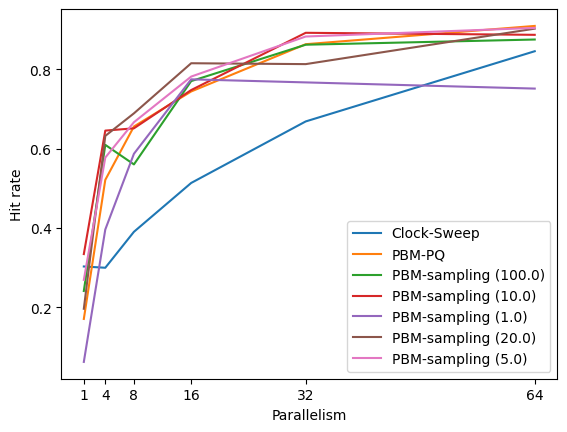

In [11]:

i = 2
for interesting_filter in interesting_filters: 
    print(interesting_filter)
    
    data = df.copy()
    for k, v in interesting_filters[interesting_filter].items():
        data = data[data[k] == v]
    
    data.sort_values('parallelism', inplace=True)
    
    plt.plot(
        data.parallelism,
        data.hit_rate,
        label=interesting_filter, 
    )
    
    plt.xticks(data.parallelism)
    plt.xlabel('Parallelism')
    plt.ylabel('Hit rate')
    plt.legend()
    
    
    